In [15]:
import pandas as pd
import math
import seaborn as sns
import numpy as np
import datetime

In [53]:
# Importando o arquivo dat para o pandas e definindo seus tipos
df = pd.read_table('table1.dat', delimiter=',', skiprows=[0,2], dtype = 'string' ).drop(0)

# Converter dados de string para numéricos
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)


In [55]:
# Tratando as datas e fuso-horários
df['TIMESTAMP'] = df['TIMESTAMP'].map(lambda a: datetime.datetime.fromisoformat(a).replace(tzinfo=datetime.timezone.utc))

# Ajustando o índice com o timestamp correspondente
df.index = df['TIMESTAMP']
df.index = df.index.map(lambda a: a.strftime('%d-%m-%y %H:%M'))

In [56]:
# Selecionando os dados que serão utilizados e Renomeando
data = df[['TIMESTAMP', 'AirTC_Avg', 'RH_Max', 'Rain_mm_Tot', 'WS_ms_Avg', 'WindDir', 'BP_kPa_Avg', 'Slr_Irrad_Global_Avg', 'Slr_Irrad_Difuse_Avg', 
           'Pyrh_Irrad_Avg']]

data = data.rename(columns={'AirTC_Avg': 'Temperatura Média (²C)', 
                            'RH_Max': 'Humidade Relativa Máx (%)',
                            'Rain_mm_Tot': 'índice Pluviométrico (mm)',
                            'WS_ms_Avg': 'Velocidade do Vento Média (m/s)',
                            'WindDir': 'Direção do Vento (Graus)',
                            'BP_kPa_Avg': 'Pressão Barométrica (kPa)',
                            'Slr_Irrad_Global_Avg': 'Irradiação Global Média (W/m²)',
                            'Slr_Irrad_Difuse_Avg': 'Irradiação Difusa Média (W/m²)',
                            'Pyrh_Irrad_Avg': 'DNI Pireliômetro (W/m²)'
                           })


In [57]:
# Adicionando Variáveis

# DNI = GLOBAL - DIFUSA
data['Irradiação Direta Média (W/m²)'] = data['Irradiação Global Média (W/m²)'] - data['Irradiação Difusa Média (W/m²)']


# Variáveis de Tempo
# Criando Listas com as datas
dates = [datetime.datetime.strptime(index, '%d-%m-%y %H:%M') for index in data.index]

day_of_year = [date.strftime('%j') for date in dates]
year = [date.year for date in dates]
month = [date.month for date in dates]
month_str = [date.strftime('%b') for date in dates]
day = [date.day for date in dates]
hour = [date.hour for date in dates]
minute = [date.minute for date in dates]

# Atribuindo as colunas do Dataframe
data['Dia do Ano'] = day_of_year
data['Dia do Ano'] = data['Dia do Ano'].astype('int64')
data['Ano'] = year
data['Mês'] = month
data['Mês do ano'] = month_str
data['Dia'] = day
data['Hora'] = hour
data['Minuto'] = minute

# Dia Juliano
data['N'] = data['Dia do Ano'] + (data['Hora']/24) + (data['Minuto']/(24*60))

In [58]:
# Ângulos Solares
latitude = -22.3717
longitude = -41.7857

cos_lat = math.cos(math.radians(latitude))
sen_lat = math.sin(math.radians(latitude))

# Declinação
data['Declinação'] = data['N'].map(lambda n: 23.45*math.sin(math.radians((360/365)*(284+n))))
data['Cos dec'] = data['Declinação'].map(lambda d: math.cos(math.radians(d)))
data['Sen dec'] = data['Declinação'].map(lambda d: math.sin(math.radians(d)))
# Máximos, mínimos:
print("Declinação Máxima: ")
display(data[data['Declinação'] == data['Declinação'].max()])
print("Declinação Mínima: ")
display(data[data['Declinação'] == data['Declinação'].min()])

# Ângulo Horário
data['h'] = (data['Hora'] + (data['Minuto']/60) - 12)*15
data['Cos h'] = data['h'].map(lambda h: math.cos(math.radians(h)))

# Cosseno do Zênite
data['Cos z'] = cos_lat*data['Cos dec']*data['Cos h']+sen_lat*data['Sen dec']

# Resetando o índice
data.reset_index(drop=True, inplace=True)
data

Declinação Máxima: 


,TIMESTAMP,Temperatura Média (²C),Humidade Relativa Máx (%),índice Pluviométrico (mm),Velocidade do Vento Média (m/s),Direção do Vento (Graus),Pressão Barométrica (kPa),Irradiação Global Média (W/m²),Irradiação Difusa Média (W/m²),DNI Pireliômetro (W/m²),...,Ano,Mês,Mês do ano,Dia,Hora,Minuto,N,Declinação,Cos dec,Sen dec
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
20-06-16 06:00,2016-06-20 06:00:00+00:00,18.66,92.9,0.0,0.029,232.7,102.0,0.0,0.0,0.0,...,2016,6,Jun,20,6,0,172.25,23.45,0.917408,0.397949


Declinação Mínima: 


,TIMESTAMP,Temperatura Média (²C),Humidade Relativa Máx (%),índice Pluviométrico (mm),Velocidade do Vento Média (m/s),Direção do Vento (Graus),Pressão Barométrica (kPa),Irradiação Global Média (W/m²),Irradiação Difusa Média (W/m²),DNI Pireliômetro (W/m²),...,Ano,Mês,Mês do ano,Dia,Hora,Minuto,N,Declinação,Cos dec,Sen dec
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
19-12-16 18:00,2016-12-19 18:00:00+00:00,26.18,80.2,0.0,2.902,74.22,101.3,54.25,53.32,0.0,...,2016,12,Dec,19,18,0,354.75,-23.45,0.917408,-0.397949


,TIMESTAMP,Temperatura Média (²C),Humidade Relativa Máx (%),índice Pluviométrico (mm),Velocidade do Vento Média (m/s),Direção do Vento (Graus),Pressão Barométrica (kPa),Irradiação Global Média (W/m²),Irradiação Difusa Média (W/m²),DNI Pireliômetro (W/m²),...,Hora,Minuto,N,Declinação,Cos dec,Sen dec,h,Cos h,Cos z,N - Anterior
93472,2016-07-25 07:02:00+00:00,18.71,94.8,0.0,1.042,200.0,102.0,18.02,17.81,0.00,...,7,2,207.293056,19.311140,0.943737,0.330698,-74.5,0.267238,0.107352,5.071528
139649,2016-10-31 11:16:00+00:00,24.75,58.1,0.0,2.582,88.8,101.9,642.30,616.50,12.34,...,11,16,305.469444,-15.506081,0.963602,-0.267341,-11.0,0.981627,0.976458,66.109722
259011,2017-03-18 06:30:00+00:00,24.78,88.8,0.0,1.034,228.9,101.3,25.20,20.34,0.00,...,6,30,77.270833,-1.504331,0.999655,-0.026253,-82.5,0.130526,0.130652,3.809028


,TIMESTAMP,Temperatura Média (²C),Humidade Relativa Máx (%),índice Pluviométrico (mm),Velocidade do Vento Média (m/s),Direção do Vento (Graus),Pressão Barométrica (kPa),Irradiação Global Média (W/m²),Irradiação Difusa Média (W/m²),DNI Pireliômetro (W/m²),...,Hora,Minuto,N,Declinação,Cos dec,Sen dec,h,Cos h,Cos z,N - Anterior
70905,2016-07-04 13:13:00+00:00,26.22,59.29,0.0,3.484,21.24,102.2,289.0,285.9,0.779,...,13,13,186.550694,22.743021,0.922248,0.386599,18.25,0.949699,0.662791,-0.001389
212825,2017-02-10 09:20:00+00:00,29.51,67.58,0.0,1.228,184.80,101.3,897.0,171.1,839.000,...,9,20,41.388889,-14.779338,0.966915,-0.255097,-40.00,0.766044,0.782044,-314.896528


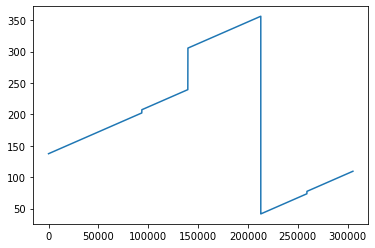

In [63]:
# BURACOS NOS DADOS
data['N'].plot()
data['N - Anterior'] = data['N'] - data['N'].shift()

display(data[data['N - Anterior'] > 0.000695])
display(data[data['N - Anterior'] < 0.000693])


In [66]:
# Cálculo da Radiação Extraterrestre
# Constante Solar
sc = 1366

# Duffie - Solar Engineering of Thermal Processes (1991)
# cos x = cos(360n/365)
data['Cos x'] = data['N'].map(lambda n: math.cos(math.radians((360/365)*n)))
data['Radiação Extraterrestre (W/m²)'] = sc*(1+0.033*data['Cos x'])*data['Cos z']

# Filtrar valores negativos
data['Radiação Extraterrestre (W/m²)'] = np.where(data['Radiação Extraterrestre (W/m²)']<0, 0, data['Radiação Extraterrestre (W/m²)'])

In [67]:
data.columns

Index(['TIMESTAMP', 'Temperatura Média (²C)', 'Humidade Relativa Máx (%)',
       'índice Pluviométrico (mm)', 'Velocidade do Vento Média (m/s)',
       'Direção do Vento (Graus)', 'Pressão Barométrica (kPa)',
       'Irradiação Global Média (W/m²)', 'Irradiação Difusa Média (W/m²)',
       'DNI Pireliômetro (W/m²)', 'Irradiação Direta Média (W/m²)',
       'Dia do Ano', 'Ano', 'Mês', 'Mês do ano', 'Dia', 'Hora', 'Minuto', 'N',
       'Declinação', 'Cos dec', 'Sen dec', 'h', 'Cos h', 'Cos z',
       'N - Anterior', 'Cos x', 'Radiação Extraterrestre (W/m²)'],
      dtype='object')

In [11]:
# DNI do Pireliômetro levando em conta o ângulo
# data['DNI Pireliômetro Cos z'] = data['DNI Pireliômetro (W/m²)']*data['Cos z']

In [68]:
################################################################################################################################


sns.relplot(x="Cos z", y="DNI Pireliômetro Cos z", hue="Irradiação Global Média (W/m²)", data=data)
sns.relplot(x='Radiação Extraterrestre (W/m²)', y="DNI Pireliômetro Cos z", hue="Irradiação Global Média (W/m²)", data=data)

ValueError: Could not interpret value `DNI Pireliômetro Cos z` for parameter `y`

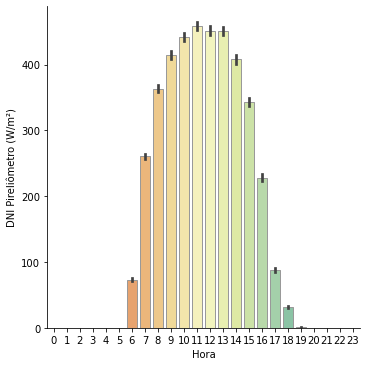

In [13]:
sns.catplot(x="Hora", y="DNI Pireliômetro (W/m²)", kind="bar",
            palette="Spectral", edgecolor=".6",
            data=dados)

<AxesSubplot:>

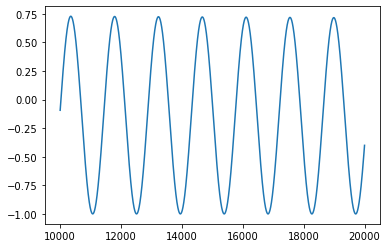

In [14]:
dados['Cos z'][10000:20000].plot()

<AxesSubplot:>

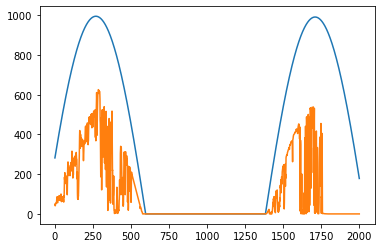

In [15]:
dados['Radiação Extraterrestre (W/m²)'][0:2000].plot()
dados['DNI Pireliômetro Cos z'][0:2000].plot()

<AxesSubplot:>

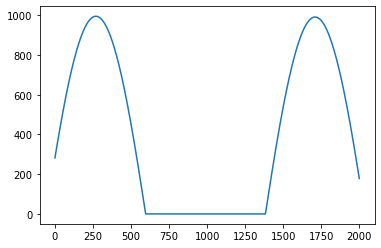

In [16]:
dados['Radiação Extraterrestre (W/m²)'][0:2000].plot()

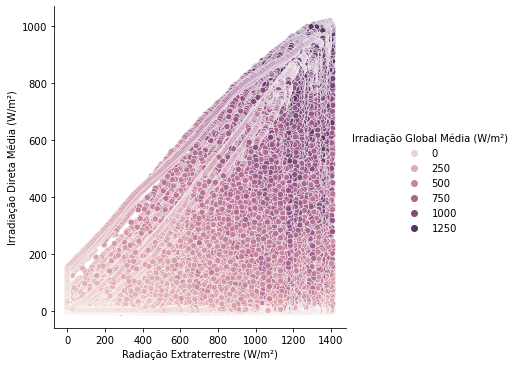

In [17]:
sns.relplot(x="Radiação Extraterrestre (W/m²)", y="Irradiação Direta Média (W/m²)", hue="Irradiação Global Média (W/m²)", data=dados)

In [18]:
teste = dados[dados['Irradiação Direta Média (W/m²)'] > dados['Radiação Extraterrestre (W/m²)']]

In [19]:
teste['Diferença'] = teste['Radiação Extraterrestre (W/m²)'] - teste['Irradiação Direta Média (W/m²)']

<ipython-input-19-b9c9fb8aeb66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['Diferença'] = teste['Radiação Extraterrestre (W/m²)'] - teste['Irradiação Direta Média (W/m²)']


In [20]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6415 entries, 1355 to 305081
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   TIMESTAMP                        6415 non-null   datetime64[ns]
 1   Temperatura Média (²C)           6415 non-null   float64       
 2   Humidade Relativa Máx (%)        6415 non-null   float64       
 3   índice Pluviométrico (mm)        6415 non-null   float64       
 4   Velocidade do Vento Média (m/s)  6415 non-null   float64       
 5   Direção do Vento (Graus)         6415 non-null   float64       
 6   Irradiação Global Média (W/m²)   6415 non-null   float64       
 7   Irradiação Difusa Média (W/m²)   6415 non-null   float64       
 8   Irradiação Direta Média (W/m²)   6415 non-null   float64       
 9   DNI Pireliômetro (W/m²)          6415 non-null   float64       
 10  Chuva Acumulada em 1h (mm)       6415 non-null   float6

In [21]:
teste.describe()

,Temperatura Média (²C),Humidade Relativa Máx (%),índice Pluviométrico (mm),Velocidade do Vento Média (m/s),Direção do Vento (Graus),Irradiação Global Média (W/m²),Irradiação Difusa Média (W/m²),Irradiação Direta Média (W/m²),DNI Pireliômetro (W/m²),Chuva Acumulada em 1h (mm),...,Declinação,Cos dec,Sen dec,h,Cos h,Cos z,Cos x,Radiação Extraterrestre (W/m²),DNI Pireliômetro Cos z,Diferença
count,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6.415000e+03,...,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000,6415.000000
mean,23.244770,80.396245,0.001861,1.708444,156.210341,56.595194,16.813652,39.781542,103.323841,7.071613e-02,...,-3.594487,0.952720,-0.061820,26.303196,-0.078042,-0.045225,0.180144,27.221557,12.492762,-12.559985
std,4.020992,11.690689,0.047325,1.283430,104.547649,123.164990,24.359737,102.797627,224.795420,4.877645e-01,...,17.346141,0.027510,0.296244,91.832963,0.199200,0.135130,0.735144,89.249439,48.520396,29.505795
min,11.720000,43.750000,0.000000,0.000000,0.072000,0.005000,0.000000,0.001000,0.000000,-1.243450e-14,...,-23.450000,0.917408,-0.397949,-171.000000,-0.987688,-0.957101,-0.999993,0.000000,-45.292297,-155.144693
25%,20.650000,71.970000,0.000000,0.609000,67.705000,1.639000,0.698000,0.280000,0.000000,-7.549517e-15,...,-19.094996,0.925782,-0.327135,-84.000000,-0.229200,-0.079763,-0.729504,0.000000,-0.000000,-3.753000
50%,23.620000,81.200000,0.000000,1.499000,127.200000,5.592000,4.550000,0.507000,0.000000,0.000000e+00,...,-12.349012,0.951821,-0.213866,88.750000,-0.056693,-0.038189,0.622346,0.000000,-0.000000,-0.503000
75%,26.680000,90.900000,0.000000,2.659000,254.150000,25.135000,22.490000,4.250000,0.805500,3.996803e-15,...,14.974252,0.976463,0.258385,103.000000,0.091502,-0.009468,0.751970,0.000000,-0.000000,-0.279500
max,31.220000,98.300000,1.778000,6.272000,354.600000,717.700000,257.200000,563.010000,820.000000,1.193800e+01,...,23.449999,0.999999,0.397949,155.000000,0.346117,0.401208,0.987529,561.041437,327.786622,-0.001000


In [22]:
# Fazer com a correção de longitude
# 

In [39]:
dados[dados['DNI Pireliômetro Cos z']>dados['Radiação Extraterrestre (W/m²)']]

,TIMESTAMP,Temperatura Média (²C),Humidade Relativa Máx (%),índice Pluviométrico (mm),Velocidade do Vento Média (m/s),Direção do Vento (Graus),Irradiação Global Média (W/m²),Irradiação Difusa Média (W/m²),Irradiação Direta Média (W/m²),DNI Pireliômetro (W/m²),...,N - Anterior,Declinação,Cos dec,Sen dec,h,Cos h,Cos z,Cos x,Radiação Extraterrestre (W/m²),DNI Pireliômetro Cos z


In [41]:
# Pode apagar depois
# Comparando as Medidas
dados[['DNI Pireliômetro Cos z','Irradiação Direta Média (W/m²)']]

,DNI Pireliômetro Cos z,Irradiação Direta Média (W/m²)
0,49.048081,65.3
1,43.822334,58.1
2,40.866530,54.2
3,44.072181,58.2
4,46.432645,61.1
...,...,...
305183,41.301602,55.7
305184,75.026612,95.9
305185,142.823680,174.5
305186,168.628194,204.6


<AxesSubplot:>

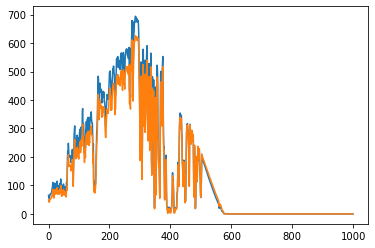

In [48]:
dados['Irradiação Direta Média (W/m²)'][0:1000].plot()
dados['DNI Pireliômetro Cos z'][0:1000].plot()

<AxesSubplot:>

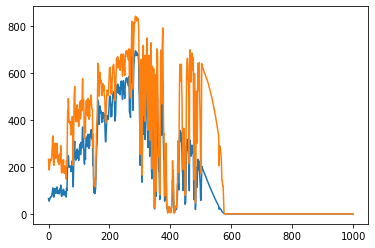

In [50]:
dados['Irradiação Direta Média (W/m²)'][0:1000].plot()
dados['DNI Pireliômetro (W/m²)'][0:1000].plot()